### CNN

In [54]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
from matplotlib.colors import ListedColormap
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(4)
from scipy import ndimage, misc

In [29]:
# making conv layer
conv = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)
conv

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))

In [3]:
conv.state_dict()['weight'][0][0]=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])
conv.state_dict()['bias'][0]=0.0
conv.state_dict()

OrderedDict([('weight',
              tensor([[[[ 1.,  0., -1.],
                        [ 2.,  0., -2.],
                        [ 1.,  0., -1.]]]])),
             ('bias', tensor([0.]))])

In [10]:
image=torch.zeros(1,1,5,5) # number of inputs, number of channels, number of rows, number of columns
image[0,0,:,2]=1           # Set the all rows of the third column to 1:
image

tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])

In [11]:
# applying conv layer to the image
z=conv(image)
z

tensor([[[[-4.,  0.,  4.],
          [-4.,  0.,  4.],
          [-4.,  0.,  4.]]]], grad_fn=<ConvolutionBackward0>)

In [12]:
K=2
conv1 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=K)
conv1.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv1.state_dict()['bias'][0]=0.0
conv1.state_dict()
conv1

Conv2d(1, 1, kernel_size=(2, 2), stride=(1, 1))

In [14]:
M=4
image1=torch.ones(1,1,M,M) # 4 x 4 matrix

<a id="ref2"></a>
<h2 align=center>Stride parameter</h2>


$$M_{new}=M-K+1$$
$$M_{new}=4-2+1$$
$$M_{new}=3$$


In [15]:
z1=conv1(image1)
print("z1:",z1)
print("shape:",z1.shape[2:4])

z1: tensor([[[[4., 4., 4.],
          [4., 4., 4.],
          [4., 4., 4.]]]], grad_fn=<ConvolutionBackward0>)
shape: torch.Size([3, 3])


<a id="ref2"></a>
<h2 align=center>Stride parameter</h2>


The parameter stride changes the number of shifts the kernel moves per iteration. As a result, the output size also changes and is given by the following formula:


$$M_{new}=\dfrac{M-K}{stride}+1$$


Create a convolution object with a stride of 2:

In [17]:
conv3 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=2,stride=2)

conv3.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv3.state_dict()['bias'][0]=0.0
conv3.state_dict()

OrderedDict([('weight',
              tensor([[[[1., 1.],
                        [1., 1.]]]])),
             ('bias', tensor([0.]))])

In [18]:
z3=conv3(image1)

print("z3:",z3)
print("shape:",z3.shape[2:4])

z3: tensor([[[[4., 4.],
          [4., 4.]]]], grad_fn=<ConvolutionBackward0>)
shape: torch.Size([2, 2])


<a id='ref3'></a>
<h2 align=center>Zero Padding </h2>


In [19]:
image1

tensor([[[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]]])

In [20]:
conv4 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=2,stride=3)
conv4.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv4.state_dict()['bias'][0]=0.0
conv4.state_dict()
z4=conv4(image1)
print("z4:",z4)
print("z4:",z4.shape[2:4])

z4: tensor([[[[4.]]]], grad_fn=<ConvolutionBackward0>)
z4: torch.Size([1, 1])


In [21]:
conv5 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=2,stride=3,padding=1)

conv5.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv5.state_dict()['bias'][0]=0.0
conv5.state_dict()
z5=conv5(image1)
print("z5:",z5)
print("z5:",z4.shape[2:4])

z5: tensor([[[[1., 2.],
          [2., 4.]]]], grad_fn=<ConvolutionBackward0>)
z5: torch.Size([1, 1])


<h1 align=center><font size = 5>Activation function and Maxpooling </h1 >


In [25]:
# Creating CONV layer

conv = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)
Gx=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0,-1.0]])
conv.state_dict()['weight'][0][0]=Gx
conv.state_dict()['bias'][0]=0.0
conv.state_dict()

OrderedDict([('weight',
              tensor([[[[ 1.,  0., -1.],
                        [ 2.,  0., -2.],
                        [ 1.,  0., -1.]]]])),
             ('bias', tensor([0.]))])

In [26]:
# making an image array
image=torch.zeros(1,1,5,5)
image[0,0,:,2]=1
image

tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])

In [27]:
# Perform the CONV to the iamge
Z=conv(image)
Z

tensor([[[[-4.,  0.,  4.],
          [-4.,  0.,  4.],
          [-4.,  0.,  4.]]]], grad_fn=<ConvolutionBackward0>)

In [28]:
# Adding relu activation function to the activation map
A=torch.relu(Z)
A

tensor([[[[0., 0., 4.],
          [0., 0., 4.],
          [0., 0., 4.]]]], grad_fn=<ReluBackward0>)

In [30]:
relu = nn.ReLU()
relu(Z)

tensor([[[[0., 0., 4.],
          [0., 0., 4.],
          [0., 0., 4.]]]], grad_fn=<ReluBackward0>)

<a id="ref1"></a>
<h2 align=center>Max Pooling </h2>


In [31]:
image1=torch.zeros(1,1,4,4)
image1[0,0,0,:]=torch.tensor([1.0,2.0,3.0,-4.0])
image1[0,0,1,:]=torch.tensor([0.0,2.0,-3.0,0.0])
image1[0,0,2,:]=torch.tensor([0.0,2.0,3.0,1.0])

image1

tensor([[[[ 1.,  2.,  3., -4.],
          [ 0.,  2., -3.,  0.],
          [ 0.,  2.,  3.,  1.],
          [ 0.,  0.,  0.,  0.]]]])

In [32]:
max1=torch.nn.MaxPool2d(2,stride=1)
max1(image1)

tensor([[[[2., 3., 3.],
          [2., 3., 3.],
          [2., 3., 3.]]]])

In [33]:
max1=torch.nn.MaxPool2d(2)
max1(image1)

tensor([[[[2., 3.],
          [2., 3.]]]])

<a id="ref0"></a>
<h2 align=center>Multiple Output Channels </h2>


Create a <code>Conv2d</code> with three channels:


In [34]:
conv1 = nn.Conv2d(in_channels=1, out_channels=3,kernel_size=3)

In [35]:
# Pytorch randomly assigns values to each kernel. However, use kernels that have  been developed to detect edges:

Gx=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])
Gy=torch.tensor([[1.0,2.0,1.0],[0.0,0.0,0.0],[-1.0,-2.0,-1.0]])

conv1.state_dict()['weight'][0][0]=Gx
conv1.state_dict()['weight'][1][0]=Gy
conv1.state_dict()['weight'][2][0]=torch.ones(3,3)

In [36]:
# Each kernel has its own bias, so set them all to zero:

conv1.state_dict()['bias'][:]=torch.tensor([0.0,0.0,0.0])
conv1.state_dict()['bias']

tensor([0., 0., 0.])

In [37]:
for x in conv1.state_dict()['weight']:
    print(x)

tensor([[[ 1.,  0., -1.],
         [ 2.,  0., -2.],
         [ 1.,  0., -1.]]])
tensor([[[ 1.,  2.,  1.],
         [ 0.,  0.,  0.],
         [-1., -2., -1.]]])
tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])


In [38]:
image=torch.zeros(1,1,5,5) # 1 img, 1 channel, 5x5 matrix
image[0,0,:,2]=1
image

tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])

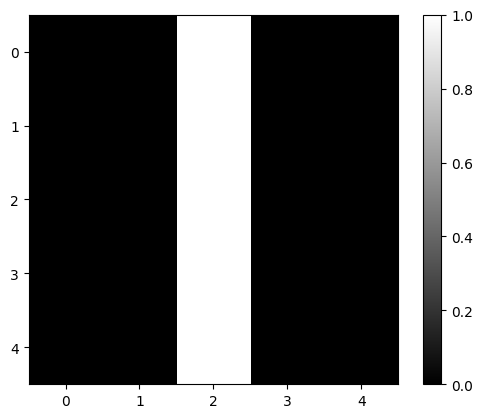

In [39]:
plt.imshow(image[0,0,:,:].numpy(), interpolation='nearest', cmap=plt.cm.gray)
plt.colorbar()
plt.show()

In [40]:
# Perform the convolution:

out=conv1(image)

In [42]:
out.shape # 1 img, 2 channels, 3x3 matrix

torch.Size([1, 3, 3, 3])

tensor([[-4.,  0.,  4.],
        [-4.,  0.,  4.],
        [-4.,  0.,  4.]], grad_fn=<UnbindBackward0>)


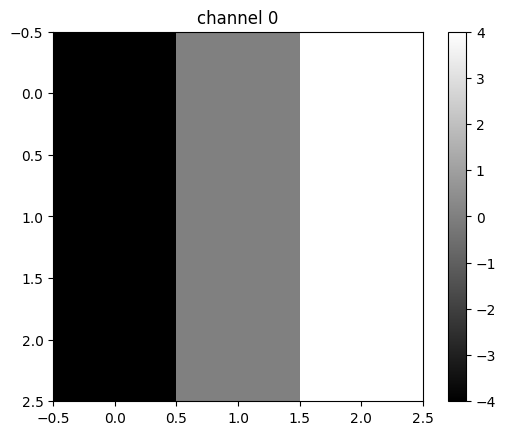

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], grad_fn=<UnbindBackward0>)


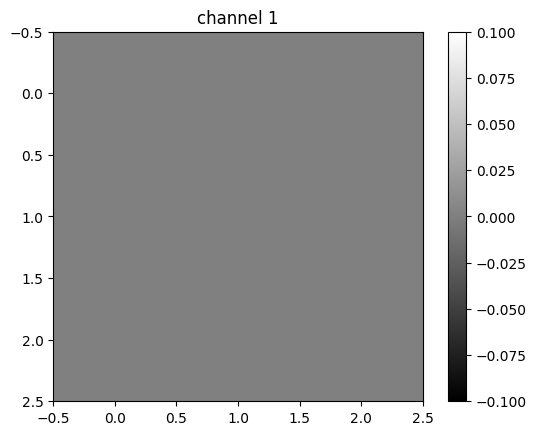

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], grad_fn=<UnbindBackward0>)


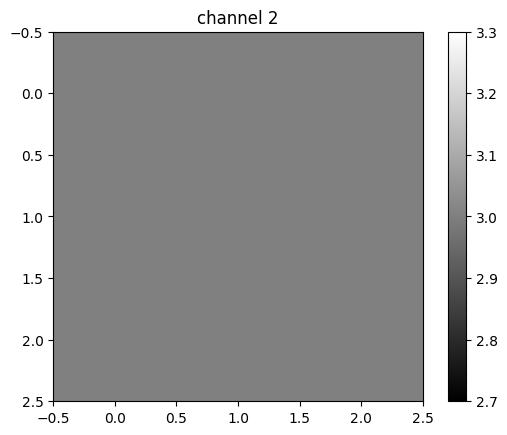

In [43]:
for channel,image in enumerate(out[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

<a id="ref1"></a>
<h2 align=center>Multiple Input Channels </h2>


In [44]:
image2=torch.zeros(1,2,5,5)
image2[0,0,2,:]=-2
image2[0,1,2,:]=1
image2

tensor([[[[ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.],
          [-2., -2., -2., -2., -2.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.]],

         [[ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 1.,  1.,  1.,  1.,  1.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.]]]])

tensor([[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [-2., -2., -2., -2., -2.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]])


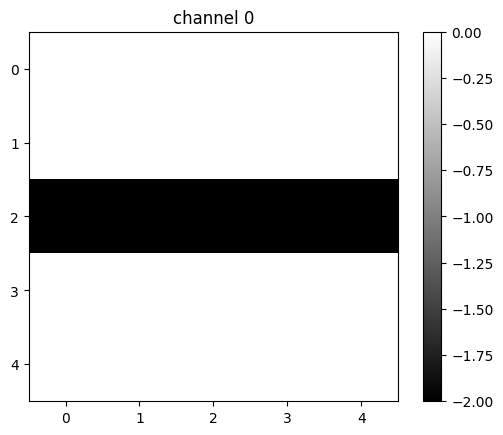

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


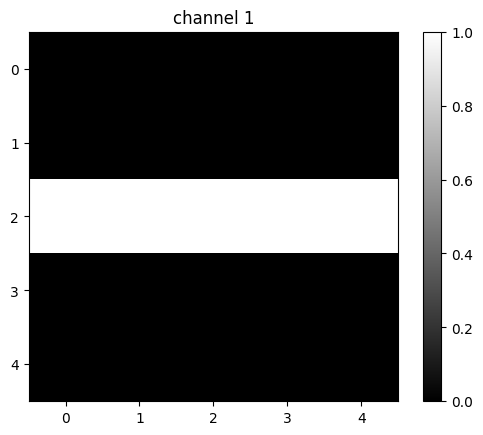

In [45]:
for channel,image in enumerate(image2[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

In [46]:
conv3 = nn.Conv2d(in_channels=2, out_channels=1,kernel_size=3)

In [47]:
# Assign kernel values to make the math a little easier:

Gx1=torch.tensor([[0.0,0.0,0.0],[0,1.0,0],[0.0,0.0,0.0]])
conv3.state_dict()['weight'][0][0]=1*Gx1
conv3.state_dict()['weight'][0][1]=-2*Gx1
conv3.state_dict()['bias'][:]=torch.tensor([0.0])

In [48]:
conv3.state_dict()['weight']

tensor([[[[ 0.,  0.,  0.],
          [ 0.,  1.,  0.],
          [ 0.,  0.,  0.]],

         [[-0., -0., -0.],
          [-0., -2., -0.],
          [-0., -0., -0.]]]])

In [49]:
# Perform the convolution:

conv3(image2)

tensor([[[[ 0.,  0.,  0.],
          [-4., -4., -4.],
          [ 0.,  0.,  0.]]]], grad_fn=<ConvolutionBackward0>)

<a id="ref2"></a>

<h2>Multiple Input and Multiple Output Channels</h2>


In [50]:
# Create an example with two inputs and three outputs and assign the kernel values to make the math a little easier:

conv4 = nn.Conv2d(in_channels=2, out_channels=3,kernel_size=3)
conv4.state_dict()['weight'][0][0]=torch.tensor([[0.0,0.0,0.0],[0,0.5,0],[0.0,0.0,0.0]])
conv4.state_dict()['weight'][0][1]=torch.tensor([[0.0,0.0,0.0],[0,0.5,0],[0.0,0.0,0.0]])


conv4.state_dict()['weight'][1][0]=torch.tensor([[0.0,0.0,0.0],[0,1,0],[0.0,0.0,0.0]])
conv4.state_dict()['weight'][1][1]=torch.tensor([[0.0,0.0,0.0],[0,-1,0],[0.0,0.0,0.0]])

conv4.state_dict()['weight'][2][0]=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])
conv4.state_dict()['weight'][2][1]=torch.tensor([[1.0,2.0,1.0],[0.0,0.0,0.0],[-1.0,-2.0,-1.0]])

In [51]:
# For each output, there is a bias, so set them all to zero:

conv4.state_dict()['bias'][:]=torch.tensor([0.0,0.0,0.0])

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


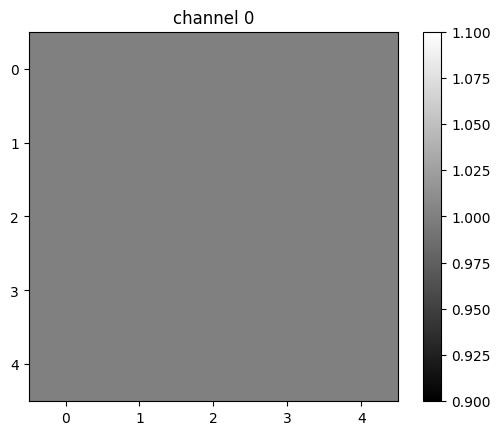

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


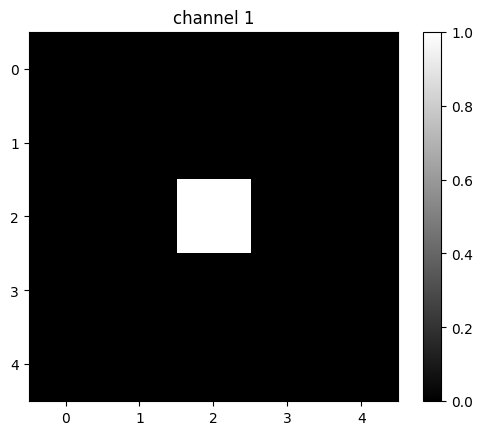

In [52]:
# Create a two-channel image and plot the results:

image4=torch.zeros(1,2,5,5)
image4[0][0]=torch.ones(5,5)
image4[0][1][2][2]=1
for channel,image in enumerate(image4[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

In [53]:
# Perform the convolution:

z=conv4(image4)
z

tensor([[[[ 0.5000,  0.5000,  0.5000],
          [ 0.5000,  1.0000,  0.5000],
          [ 0.5000,  0.5000,  0.5000]],

         [[ 1.0000,  1.0000,  1.0000],
          [ 1.0000,  0.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000]],

         [[-1.0000, -2.0000, -1.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 1.0000,  2.0000,  1.0000]]]], grad_fn=<ConvolutionBackward0>)

### **CNN**

In [55]:
def plot_channels(W):
    #number of output channels
    n_out=W.shape[0]
    #number of input channels
    n_in=W.shape[1]
    w_min=W.min().item()
    w_max=W.max().item()
    fig, axes = plt.subplots(n_out,n_in)
    fig.subplots_adjust(hspace = 0.1)
    out_index=0
    in_index=0
    #plot outputs as rows inputs as columns
    for ax in axes.flat:

        if in_index>n_in-1:
            out_index=out_index+1
            in_index=0

        ax.imshow(W[out_index,in_index,:,:], vmin=w_min, vmax=w_max, cmap='seismic')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        in_index=in_index+1

    plt.show()

In [56]:
def show_data(dataset,sample):

    plt.imshow(dataset.x[sample,0,:,:].numpy(),cmap='gray')
    plt.title('y='+str(dataset.y[sample].item()))
    plt.show()

In [57]:
# create some toy data

from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self,N_images=100,offset=0,p=0.9, train=False):
        """
        p:portability that pixel is wight
        N_images:number of images
        offset:set a random vertical and horizontal offset images by a sample should be less than 3
        """
        if train==True:
            np.random.seed(1)

        #make images multiple of 3
        N_images=2*(N_images//2)
        images=np.zeros((N_images,1,11,11))
        start1=3
        start2=1
        self.y=torch.zeros(N_images).type(torch.long)

        for n in range(N_images):
            if offset>0:

                low=int(np.random.randint(low=start1, high=start1+offset, size=1))
                high=int(np.random.randint(low=start2, high=start2+offset, size=1))
            else:
                low=4
                high=1

            if n<=N_images//2:
                self.y[n]=0
                images[n,0,high:high+9,low:low+3]= np.random.binomial(1, p, (9,3))
            elif  n>N_images//2:
                self.y[n]=1
                images[n,0,low:low+3,high:high+9] = np.random.binomial(1, p, (3,9))



        self.x=torch.from_numpy(images).type(torch.FloatTensor)
        self.len=self.x.shape[0]
        del(images)
        np.random.seed(0)
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len

<code>plot_activation</code>: plot out the activations of the Convolutional layers  


In [58]:
def plot_activations(A,number_rows= 1,name=""):
    A=A[0,:,:,:].detach().numpy()
    n_activations=A.shape[0]


    print(n_activations)
    A_min=A.min().item()
    A_max=A.max().item()

    if n_activations==1:

        # Plot the image.
        plt.imshow(A[0,:], vmin=A_min, vmax=A_max, cmap='seismic')

    else:
        fig, axes = plt.subplots(number_rows, n_activations//number_rows)
        fig.subplots_adjust(hspace = 0.4)
        for i,ax in enumerate(axes.flat):
            if i< n_activations:
                # Set the label for the sub-plot.
                ax.set_xlabel( "activation:{0}".format(i+1))

                # Plot the image.
                ax.imshow(A[i,:], vmin=A_min, vmax=A_max, cmap='seismic')
                ax.set_xticks([])
                ax.set_yticks([])
    plt.show()

In [59]:
# Utility function for computing output of convolutions takes a tuple of (h,w) and returns a tuple of (h,w)

def conv_output_shape(h_w, kernel_size=1, stride=1, pad=0, dilation=1):
    #by Duane Nielsen
    from math import floor
    if type(kernel_size) is not tuple:
        kernel_size = (kernel_size, kernel_size)
    h = floor( ((h_w[0] + (2 * pad) - ( dilation * (kernel_size[0] - 1) ) - 1 )/ stride) + 1)
    w = floor( ((h_w[1] + (2 * pad) - ( dilation * (kernel_size[1] - 1) ) - 1 )/ stride) + 1)
    return h, w

In [60]:
# Load the training dataset with 10000 samples
N_images=10000
train_dataset=Data(N_images=N_images)

In [61]:
# Load the testing dataset

validation_dataset=Data(N_images=1000,train=False)
validation_dataset

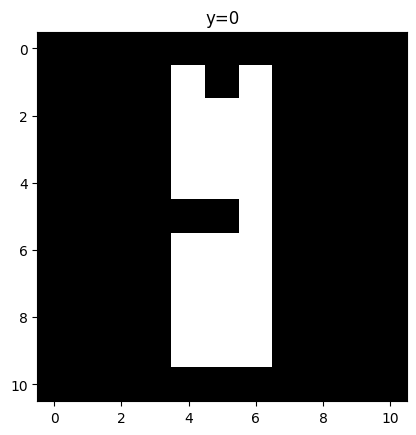

In [62]:
show_data(train_dataset,0)

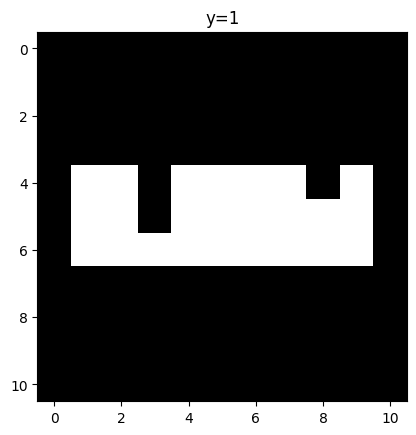

In [63]:
show_data(train_dataset,N_images//2+2)

<a id="ref3"></a>
### Build a Convolutional Neral Network Class


In [64]:
out=conv_output_shape((11,11), kernel_size=2, stride=1, pad=0, dilation=1)
print(out)
out1=conv_output_shape(out, kernel_size=2, stride=1, pad=0, dilation=1)
print(out1)
out2=conv_output_shape(out1, kernel_size=2, stride=1, pad=0, dilation=1)
print(out2)

out3=conv_output_shape(out2, kernel_size=2, stride=1, pad=0, dilation=1)
print(out3)

(10, 10)
(9, 9)
(8, 8)
(7, 7)


Build a Convolutional Network class with two Convolutional layers and one fully connected layer. Pre-determine the size of the final output matrix. The parameters in the constructor are the number of output channels for the first and second layer.


In [66]:
class CNN(nn.Module):
    def __init__(self,out_1=2,out_2=1):

        super(CNN,self).__init__()
        #first Convolutional layers
        self.cnn1=nn.Conv2d(in_channels=1,out_channels=out_1,kernel_size=2,padding=0)
        self.maxpool1=nn.MaxPool2d(kernel_size=2 ,stride=1)

        #second Convolutional layers
        self.cnn2=nn.Conv2d(in_channels=out_1,out_channels=out_2,kernel_size=2,stride=1,padding=0)
        self.maxpool2=nn.MaxPool2d(kernel_size=2 ,stride=1)
        #max pooling

        #fully connected layer
        self.fc1=nn.Linear(out_2*7*7,2)

    def forward(self,x):
        #first Convolutional layers
        x=self.cnn1(x)
        #activation function
        x=torch.relu(x)
        #max pooling
        x=self.maxpool1(x)
        #second Convolutional layers
        x=self.cnn2(x)
        #activation function
        x=torch.relu(x)
        #max pooling
        x=self.maxpool2(x)
        #flatten output
        x=x.view(x.size(0),-1)
        #fully connected layer
        x=self.fc1(x)
        return x

    def activations(self,x):
        #outputs activation this is not necessary just for fun
        z1=self.cnn1(x)
        a1=torch.relu(z1)
        out=self.maxpool1(a1)

        z2=self.cnn2(out)
        a2=torch.relu(z2)
        out=self.maxpool2(a2)
        out=out.view(out.size(0),-1)
        return z1,a1,z2,a2,out

In [68]:
model=CNN(2,1)
model

CNN(
  (cnn1): Conv2d(1, 2, kernel_size=(2, 2), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(2, 1, kernel_size=(2, 2), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=49, out_features=2, bias=True)
)

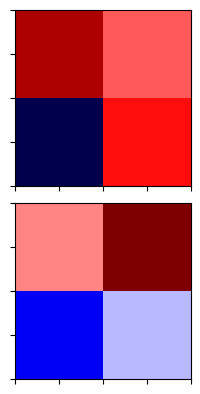

In [69]:

plot_channels(model.state_dict()['cnn1.weight'])


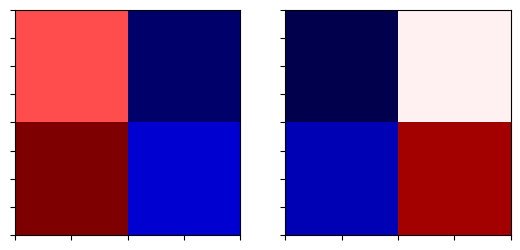

In [70]:
plot_channels(model.state_dict()['cnn2.weight'])

In [71]:
criterion=nn.CrossEntropyLoss()

In [72]:
learning_rate=0.001

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [73]:

train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=10)
validation_loader=torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=20)

Train the model and determine validation accuracy technically test accuracy **(This may take a long time)**


In [74]:
n_epochs=10
cost_list=[]
accuracy_list=[]
N_test=len(validation_dataset)
cost=0
#n_epochs
for epoch in range(n_epochs):
    cost=0
    for x, y in train_loader:


        #clear gradient
        optimizer.zero_grad()
        #make a prediction
        z=model(x)
        # calculate loss
        loss=criterion(z,y)
        # calculate gradients of parameters
        loss.backward()
        # update parameters
        optimizer.step()
        cost+=loss.item()
    cost_list.append(cost)


    correct=0
    #perform a prediction on the validation  data
    for x_test, y_test in validation_loader:

        z=model(x_test)
        _,yhat=torch.max(z.data,1)

        correct+=(yhat==y_test).sum().item()


    accuracy=correct/N_test

    accuracy_list.append(accuracy)




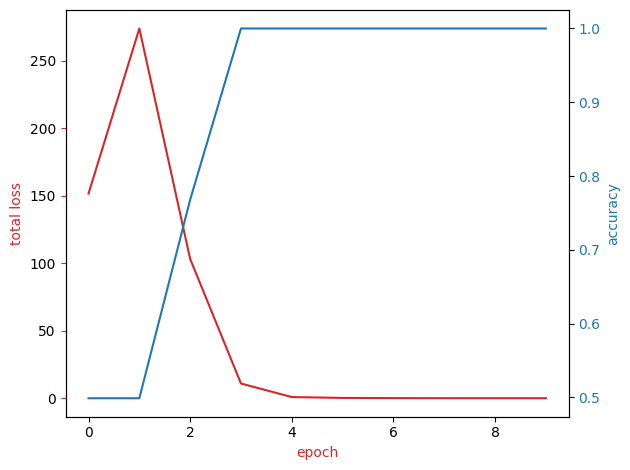

In [75]:
# Plot the loss and accuracy on the validation data:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()